In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brewltstic1/file.csv


In [2]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt 
import seaborn as sns
import folium
from folium import plugins

In [3]:
brew = pd.read_csv("../input/brewltstic1/file.csv")

In [4]:
df_filter = brew.filter(["latitude","longitude","acq_date","frp"])
df_filter.head()

latitude  longitude  acq_date   frp
0   31.8349   -83.0561  2020/1/1  18.9
1   36.3562   -76.8050  2020/1/1  10.2
2   33.4178  -110.8616  2020/1/1  24.9
3   41.4810   -90.8294  2020/1/1  13.8
4   38.6973   -90.1281  2020/1/1  14.1

In [5]:
df = df_filter[df_filter['acq_date']>='2020-01-01']
df.head()

latitude  longitude  acq_date   frp
0   31.8349   -83.0561  2020/1/1  18.9
1   36.3562   -76.8050  2020/1/1  10.2
2   33.4178  -110.8616  2020/1/1  24.9
3   41.4810   -90.8294  2020/1/1  13.8
4   38.6973   -90.1281  2020/1/1  14.1

In [6]:
data_topaffected = df.sort_values(by='frp',ascending=False).head(10)
data_topaffected

latitude  longitude    acq_date      frp
132089   40.2061  -106.2097  2020/10/16  16146.4
132094   40.2038  -106.2145  2020/10/16  15199.9
119795   41.0265  -106.3754   2020/9/30  15154.8
79783    40.6271  -106.7641    2020/9/7  10452.0
79803    40.6308  -106.7938    2020/9/7  10291.5
83662    41.8671  -123.4163    2020/9/8  10202.4
83670    41.8588  -123.4223    2020/9/8  10186.9
79782    40.6256  -106.8010    2020/9/7  10138.4
83680    41.8325  -123.3877    2020/9/8  10133.3
83678    41.8410  -123.3817    2020/9/8  10116.7

In [7]:
#Create a map
m = folium.Map(location=[37,-101], control_scale=True, zoom_start=4.5,attr = "text some")
df_copy = data_topaffected.copy()

for i in range(0,len(df_copy)):
    
    folium.Marker(
    location=[df_copy.iloc[i]['latitude'], df_copy.iloc[i]['longitude']],
    #popup=popup,
    tooltip="frp: " + str(df_copy.iloc[i]['frp']) + "<br/> date: "+ str(df_copy.iloc[i]['acq_date']),
    icon=folium.Icon(color='red',icon='fire',prefix="fa"),
    ).add_to(m)
        
m


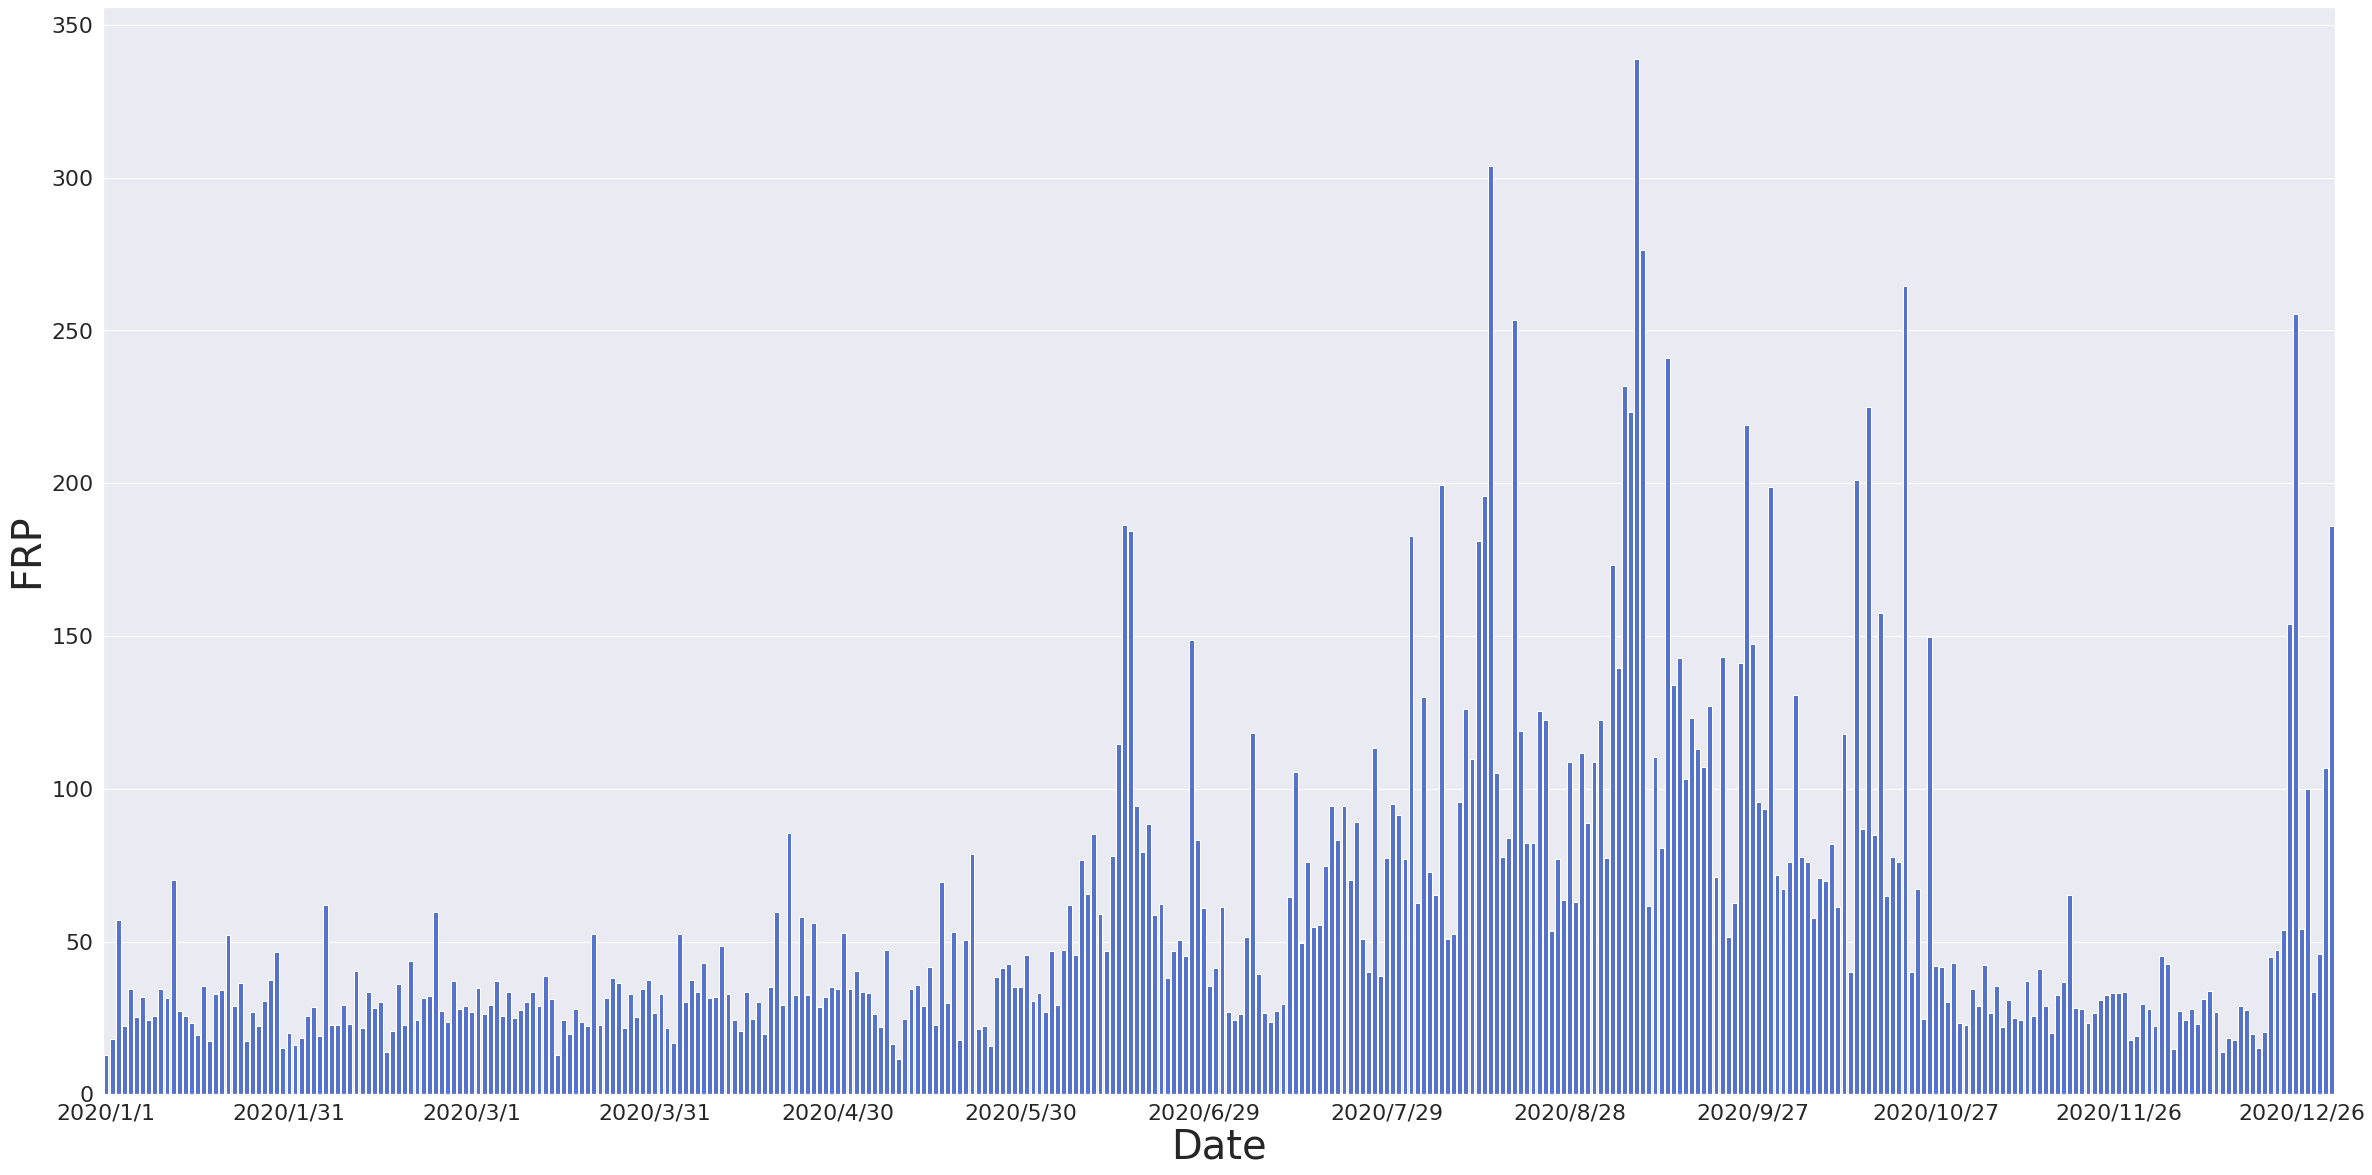

In [8]:
plt.figure(figsize=(40,20))
sns.set(font_scale = 2)
ax = sns.barplot(x='acq_date',y='frp',data=df,ci = 0,color = 'royalblue')
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 30 == 0:  
        label.set_visible(True)
    else:
        label.set_visible(False)
        ax.set_xlabel("Date", fontsize = 40)
        ax.set_ylabel("FRP", fontsize = 40)
        

In [9]:
dfdate = df[['acq_date','frp']].set_index('acq_date')
dfdate_highest = dfdate.groupby('acq_date').sum().sort_values(by='frp',ascending=False)
dfdate_highest.head(10)

frp
acq_date             
2020/9/8    1655833.1
2020/9/9    1601789.8
2020/9/7     834482.0
2020/8/19    517667.1
2020/9/13    414305.7
2020/9/14    414123.4
2020/9/6     389043.2
2020/10/22   354224.7
2020/8/20    346815.1
2020/9/15    262088.4

In [10]:
from folium.plugins import HeatMapWithTime

In [11]:
from folium.plugins import HeatMapWithTime

def getmap(ip_data,location,zoom,radius):
    
   
    dfmap = ip_data[['acq_date','latitude','longitude','frp']]
    df_day_list = []
    for day in dfmap.acq_date.sort_values().unique():
        df_day_list.append(dfmap.loc[dfmap.acq_date == day, ['acq_date','latitude', 'longitude', 'frp']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist())
    
  
    m = folium.Map(location, zoom_start=zoom,tiles='Stamen Terrain')
  
    HeatMapWithTime(df_day_list,index =list(dfmap.acq_date.sort_values().unique()), auto_play=False,radius=radius, gradient={0.5: 'blue', 0.8: 'lime', 0.9: 'orange', 1: 'red'}, min_opacity=0.5, max_opacity=1, use_local_extrema=True).add_to(m)

    return m
getmap(df,[31,-83],3.5,3)